# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [1]:
data <- iris

In [2]:
head(data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
summary(data)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [4]:
#library(devtools)
#install_github("karpatit/mechkar")
require(mechkar)

Loading required package: mechkar



In [23]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=False)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [7]:
tab1 <- train_test(data = data, train_name = "temp", test_name = "test",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



  |======================================================================| 100%

You got a perfectly balanced training and test datasets

 



In [8]:
dim(temp)
dim(test)

[1] 105   5

[1] 45  5

In [9]:
tab1

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,150,105,45,NA
Sepal.Length,Mean (SD),5.8 (0.8),5.8 (0.9),5.8 (0.7),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.8 (5.1-6.4),5.8 (5.2-6.5),0.991
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.4),3.1 (0.4),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.3),3.0 (2.8-3.4),3.0 (2.8-3.3),0.832
Petal.Length,Mean (SD),3.8 (1.8),3.8 (1.8),3.7 (1.7),NA
Petal.Length,Median (IQR),4.3 (1.6-5.1),4.4 (1.6-5.1),4.2 (1.5-5.3),0.959
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.8),1.2 (0.8),NA
Petal.Width,Median (IQR),1.3 (0.3-1.8),1.4 (0.3-1.8),1.3 (0.3-1.8),0.95


## Train and Dev

In [14]:
tab2 <- train_test(data = temp, train_name = "train", test_name = "dev",prop = 0.7, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



  |======================================================================| 100%

You got a perfectly balanced training and test datasets

 



In [15]:
dim(train)
dim(dev)

[1] 73  5

[1] 32  5

In [16]:
tab2

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
Individuals,n,105,73,32,NA
Sepal.Length,Mean (SD),5.8 (0.9),5.9 (0.9),5.8 (0.9),NA
Sepal.Length,Median (IQR),5.8 (5.1-6.4),5.7 (5.1-6.4),6.0 (5.0-6.3),0.847
Sepal.Width,Mean (SD),3.1 (0.4),3.1 (0.4),3.0 (0.5),NA
Sepal.Width,Median (IQR),3.0 (2.8-3.4),3.0 (2.8-3.4),3.0 (2.8-3.2),0.511
Petal.Length,Mean (SD),3.8 (1.8),3.7 (1.8),3.9 (1.8),NA
Petal.Length,Median (IQR),4.4 (1.6-5.1),4.4 (1.5-5.1),4.5 (1.7-5.2),0.536
Petal.Width,Mean (SD),1.2 (0.8),1.2 (0.8),1.2 (0.8),NA
Petal.Width,Median (IQR),1.4 (0.3-1.8),1.3 (0.3-1.8),1.4 (0.3-1.8),0.795


In [18]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

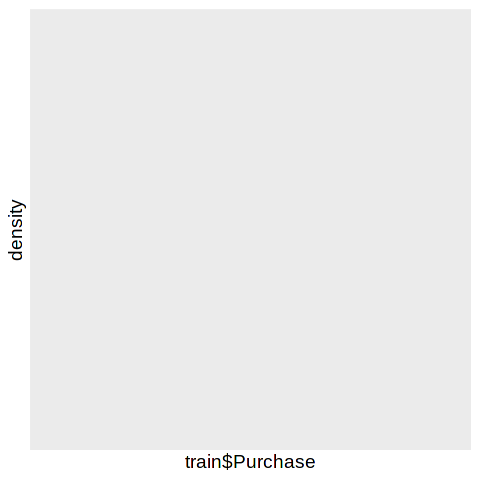

In [19]:
require(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 4)

ggplot() +
    geom_density(aes(x=train$Purchase),color="red",alpha=0.3) +
    geom_density(aes(x=dev$Purchase),color="blue",alpha=0.3) +
    geom_density(aes(x=test$Purchase),color="green",alpha=0.3)


# Train-Dev

In [16]:
library(ranger)

mod1 <- ranger(Purchase ~., data=train)


Growing trees.. Progress: 12%. Estimated remaining time: 3 minutes, 47 seconds.
Growing trees.. Progress: 24%. Estimated remaining time: 3 minutes, 14 seconds.
Growing trees.. Progress: 34%. Estimated remaining time: 3 minutes, 3 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 2 minutes, 40 seconds.
Growing trees.. Progress: 54%. Estimated remaining time: 2 minutes, 12 seconds.
Growing trees.. Progress: 65%. Estimated remaining time: 1 minute, 41 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 1 minute, 9 seconds.
Growing trees.. Progress: 85%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 94%. Estimated remaining time: 20 seconds.
Computing prediction error.. Progress: 57%. Estimated remaining time: 23 seconds.


In [ ]:
mod1

In [ ]:
pred1 <- predict(mod1, newdata=test)


# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [25]:
library(caret)
# load the iris dataset
data(iris)

Loading required package: lattice



In [27]:
# define training control
train_control <- trainControl(method = "repeatedcv", repeats = 5)
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ranger")

In [28]:
# summarize results
print(model)

Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa
  2     gini        0.9546667  0.932
  2     extratrees  0.9533333  0.930
  3     gini        0.9586667  0.938
  3     extratrees  0.9533333  0.930
  4     gini        0.9600000  0.940
  4     extratrees  0.9573333  0.936

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 4, splitrule = gini
 and min.node.size = 1.


In [22]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="rangery

")

ERROR: Error in trainControl(method = "LOOCV"): could not find function "trainControl"


In [40]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa
  0.01          0.9333333  0.9  
  0.50          0.9333333  0.9  
  0.99          0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


In [23]:
?caret::trainControl

In [24]:
?carer::train

ERROR: Error in find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called ‘carer’


# Boostrapping



In [20]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=iris, trControl=train_control,method="ranger")

ERROR: Error in trainControl(method = "boot", number = 100): could not find function "trainControl"


In [38]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictors
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9432746  0.9140960
  0.50          0.9432746  0.9140960
  0.99          0.9434500  0.9143576

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Dataset Inbalance

In [17]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance
Loading required package: ROSE
Loaded ROSE 0.0-3



In [18]:
data(newthyroid1)
head(newthyroid1)

T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
105,7.3,1.5,1.5,-0.1,negative
67,23.3,7.4,1.8,-0.6,positive
111,8.4,1.5,0.8,1.2,negative
89,14.3,4.1,0.5,0.2,positive
105,9.5,1.8,1.6,3.6,negative
110,20.3,3.7,0.6,0.2,positive


In [19]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [20]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [21]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [57]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [22]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [23]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [24]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 